/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_2569104/1954289662.py:13: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  storage = JournalStorage(JournalFileStorage(os.path.join(optuna_dir, "optuna.log")))
[I 2024-03-05 03:20:50,387] Using an existing study with name 'ta_3' instead of creating a new one.


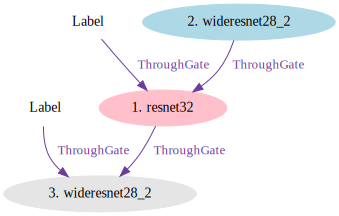

In [1]:
# Import packages
import os
import optuna
import pandas as pd
from graphviz import Digraph
from optuna.storages import JournalFileStorage, JournalStorage


target_model = "resnet32"
num_nodes = 3
study_name = f"ta_{num_nodes}"
optuna_dir = f"optuna/{study_name}"
storage = JournalStorage(JournalFileStorage(os.path.join(optuna_dir, "optuna.log")))
study = optuna.create_study(
    storage=storage,
    study_name=study_name,
    load_if_exists=True,
)

study_df = study.trials_dataframe()
complete_df = study_df[study_df.state == "COMPLETE"]
sorted_df = complete_df.sort_values(by="value", ascending=False)

with pd.option_context("mode.copy_on_write", True):
    sorted_df["params_0_model"] = target_model
top_series = sorted_df.iloc[0]

models = sorted(list(filter(lambda x: "model" in x, top_series.keys())))

edge_color = {"ThroughGate": "10", "PositiveLinearGate": "4", "NegativeLinearGate": "2"}

G = Digraph(format="svg")
for model_id, model in enumerate(models):
    color = "pink" if model_id == 0 else "gray90"
    node_name = f"{model_id+1}. {top_series[model]}"
    G.node(node_name, color=color, fillcolor=color, style="filled")
    gate_names = []
    for j, m in enumerate(models):
        gate_name = top_series[f"params_{model_id}_{j}_gate"]
        gate_names.append(gate_name)
        if gate_name == "CutoffGate":
            continue
        n = f"{j+1}. {top_series[m]}"
        if model_id == j:
            label_node_name = f"{model_id+1}. label"
            G.node(label_node_name, label="Label", color="white", style="filled")
            G.edge(
                label_node_name,
                node_name,
                label=gate_name,
                fontsize="13",
                fontcolor=edge_color[gate_name],
                color=edge_color[gate_name],
                colorscheme="paired12",
            )
        else:
            G.edge(
                n,
                node_name,
                label=gate_name,
                fontsize="13",
                fontcolor=edge_color[gate_name],
                color=edge_color[gate_name],
                colorscheme="paired12",
            )
    if all(gate_name == "CutoffGate" for gate_name in gate_names):
        G.node(node_name, color="lightblue", fillcolor="lightblue", style="filled")

G.render("LinearGate")
display(G)

In [2]:
complete_df.to_csv("result_sample_ktg_node_3.csv")

In [3]:
import numpy as np

num_bins = 100000

data_df = sorted_df[list(filter(lambda x: "params" in x, sorted_df.keys())) + ["value"]]

min_value = data_df["value"].min()
max_value = data_df["value"].max()

Q1 = data_df["value"].quantile(0.25)
Q3 = data_df["value"].quantile(0.75)
IQR = Q3 - Q1

range_value = data_df["value"].max() - data_df["value"].min()
bin_width = 2 * IQR * len(data_df["value"]) ** (-1 / 3)

num_bins = int(range_value / bin_width)
bins = np.linspace(min_value, max_value, num_bins + 1)

sampled_data = []
for i in range(num_bins):
    bin_data = data_df[(bins[i] <= data_df["value"]) & (data_df["value"] < bins[i + 1])]
    if not bin_data.empty:
        sampled_data.append(bin_data.sample(1))
    else:
        print(f"Bin {i} is empty.")

sampled_data_df = pd.concat(sampled_data, ignore_index=True)

display(sampled_data_df)

Bin 1 is empty.
Bin 2 is empty.
Bin 3 is empty.
Bin 4 is empty.
Bin 5 is empty.
Bin 6 is empty.
Bin 7 is empty.
Bin 8 is empty.
Bin 9 is empty.
Bin 10 is empty.
Bin 11 is empty.
Bin 12 is empty.
Bin 13 is empty.
Bin 14 is empty.
Bin 15 is empty.
Bin 16 is empty.
Bin 17 is empty.
Bin 18 is empty.
Bin 19 is empty.
Bin 20 is empty.
Bin 21 is empty.
Bin 22 is empty.
Bin 23 is empty.
Bin 24 is empty.
Bin 25 is empty.
Bin 26 is empty.
Bin 27 is empty.
Bin 28 is empty.
Bin 29 is empty.
Bin 30 is empty.
Bin 31 is empty.
Bin 32 is empty.
Bin 33 is empty.
Bin 34 is empty.
Bin 35 is empty.
Bin 36 is empty.
Bin 37 is empty.
Bin 38 is empty.
Bin 40 is empty.
Bin 41 is empty.
Bin 42 is empty.
Bin 43 is empty.
Bin 44 is empty.
Bin 45 is empty.
Bin 46 is empty.
Bin 47 is empty.
Bin 48 is empty.
Bin 49 is empty.
Bin 50 is empty.
Bin 51 is empty.
Bin 52 is empty.
Bin 53 is empty.
Bin 54 is empty.
Bin 55 is empty.
Bin 56 is empty.
Bin 57 is empty.
Bin 58 is empty.
Bin 59 is empty.
Bin 60 is empty.
Bin 61

,params_0_0_gate,params_0_1_gate,params_0_2_gate,params_1_0_gate,params_1_1_gate,params_1_2_gate,params_1_model,params_2_0_gate,params_2_1_gate,params_2_2_gate,params_2_model,params_0_model,value
0,CutoffGate,CutoffGate,CutoffGate,ThroughGate,CutoffGate,NegativeLinearGate,resnet110,PositiveLinearGate,PositiveLinearGate,NegativeLinearGate,resnet32,resnet32,0.76
1,CutoffGate,ThroughGate,CutoffGate,NegativeLinearGate,CutoffGate,PositiveLinearGate,resnet110,NegativeLinearGate,NegativeLinearGate,NegativeLinearGate,resnet32,resnet32,34.33
2,CutoffGate,ThroughGate,NegativeLinearGate,PositiveLinearGate,CutoffGate,ThroughGate,resnet110,NegativeLinearGate,ThroughGate,NegativeLinearGate,resnet32,resnet32,60.35
3,CutoffGate,ThroughGate,PositiveLinearGate,NegativeLinearGate,CutoffGate,PositiveLinearGate,wideresnet28_2,PositiveLinearGate,PositiveLinearGate,PositiveLinearGate,resnet32,resnet32,60.96
4,CutoffGate,ThroughGate,PositiveLinearGate,ThroughGate,NegativeLinearGate,PositiveLinearGate,resnet32,NegativeLinearGate,PositiveLinearGate,CutoffGate,wideresnet28_2,resnet32,61.73
5,CutoffGate,NegativeLinearGate,PositiveLinearGate,NegativeLinearGate,NegativeLinearGate,PositiveLinearGate,resnet32,NegativeLinearGate,PositiveLinearGate,CutoffGate,resnet32,resnet32,62.48
6,CutoffGate,CutoffGate,NegativeLinearGate,CutoffGate,CutoffGate,CutoffGate,wideresnet28_2,PositiveLinearGate,NegativeLinearGate,NegativeLinearGate,resnet110,resnet32,67.88
7,NegativeLinearGate,NegativeLinearGate,PositiveLinearGate,NegativeLinearGate,NegativeLinearGate,PositiveLinearGate,wideresnet28_2,PositiveLinearGate,CutoffGate,CutoffGate,wideresnet28_2,resnet32,68.97
8,CutoffGate,CutoffGate,NegativeLinearGate,NegativeLinearGate,NegativeLinearGate,CutoffGate,wideresnet28_2,ThroughGate,PositiveLinearGate,ThroughGate,resnet32,resnet32,69.67
9,ThroughGate,NegativeLinearGate,CutoffGate,PositiveLinearGate,CutoffGate,CutoffGate,resnet110,NegativeLinearGate,ThroughGate,PositiveLinearGate,wideresnet28_2,resnet32,70.55
